In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import chisquare

In [3]:
#Carga de datos
df = pd.read_csv('defweb23.csv',  sep=';')

In [3]:
# Filtrar solo defunciones con causa X70 (suicidio)
suicidio_df = df[df["CAUSA"] == "X70"]

# Ver provincias (valores únicos de la columna PROVRES)
provincias_neumonia = suicidio_df["PROVRES"].unique()

print("Provincias con defunciones por suicidio (X70):")
print(provincias_neumonia)

conteo_provincias = suicidio_df["PROVRES"].value_counts()

print("Número de registros de defunciones por suicidio por provincia:")
print(conteo_provincias)

Provincias con defunciones por suicidio (X70):
[66 94 82 50  6 30 18 14 54 38 62 70 90 58 26 86 22 10 99 78 74 46 42 34
 98  2]
Número de registros de defunciones por suicidio por provincia:
PROVRES
6     32
82    29
14    29
50    27
30    26
90    26
18    24
66    24
38    23
54    23
70    23
34    22
86    21
62    21
10    20
58    20
22    20
46    19
78    17
74    17
42    14
94    11
26     9
99     6
2      3
98     2
Name: count, dtype: int64


In [18]:
# Contar cuántas veces aparece cada código de causa
conteo_causas = df["CAUSA"].value_counts()

# Mostrar la causa más común (la que más se repite)
causa_mas_comun = conteo_causas.idxmax()
frecuencia = conteo_causas.max()

print(f"La causa más común es '{causa_mas_comun}' con {frecuencia} registros.")


La causa más común es 'J18' con 651 registros.


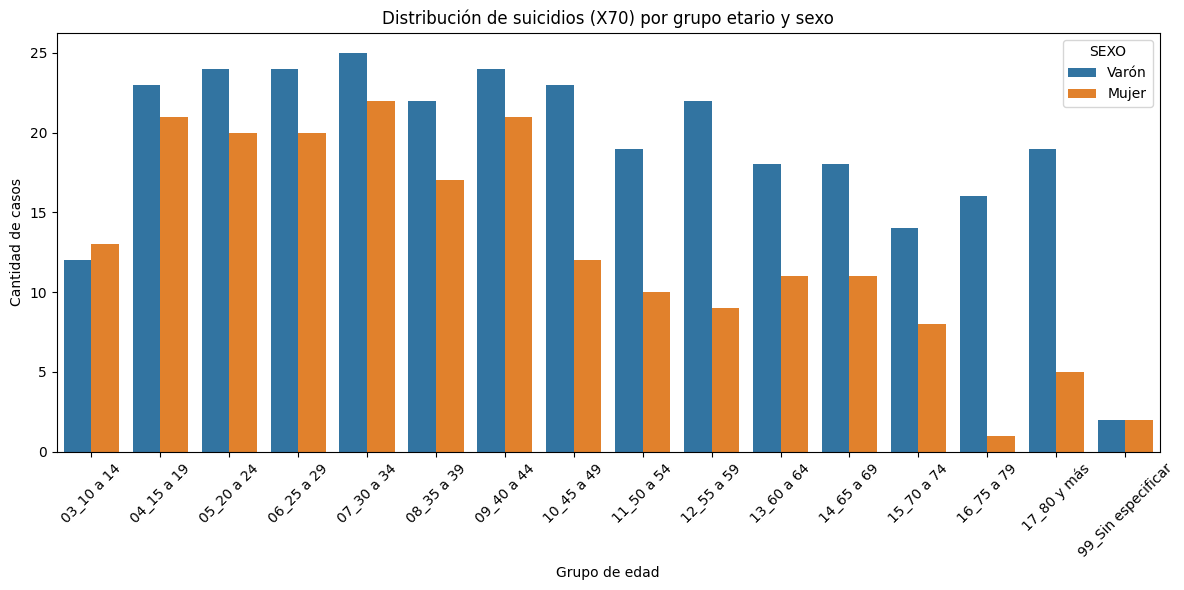

In [4]:
#Filtrar solo suicidios (código CIE-10 X70)
suicidios_df = df[df["CAUSA"] == "X70"]

#Agrupar por grupo de edad y sexo
grupo_edad_sexo = suicidios_df.groupby(["GRUPEDAD", "SEXO"]).size().reset_index(name="CUENTA")

#Mapear SEXO a nombres legibles (1=Varón, 2=Mujer)
grupo_edad_sexo["SEXO"] = grupo_edad_sexo["SEXO"].map({1: "Varón", 2: "Mujer"})

#Visualización con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grupo_edad_sexo, x="GRUPEDAD", y="CUENTA", hue="SEXO")

plt.title("Distribución de suicidios (X70) por grupo etario y sexo")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:

suicidios_df = df[df["CAUSA"] == "X70"]

provincias_suicidios = suicidios_df["PROVRES"].unique()

print("Provincias con defunciones por suicidio (X70):")

print(provincias_suicidios)

conteo_provincias = suicidios_df["PROVRES"].value_counts()

print("Número de registros de defunciones por suicidio por provincia:")
print(conteo_provincias)

Provincias con defunciones por suicidio (X70):
[66 94 82 50  6 30 18 14 54 38 62 70 90 58 26 86 22 10 99 78 74 46 42 34
 98  2]
Número de registros de defunciones por suicidio por provincia:
PROVRES
6     32
82    29
14    29
50    27
30    26
90    26
18    24
66    24
38    23
54    23
70    23
34    22
86    21
62    21
10    20
58    20
22    20
46    19
78    17
74    17
42    14
94    11
26     9
99     6
2      3
98     2
Name: count, dtype: int64
